# 1.5　Google Colaboratoryを用いたPythonプログラミング：疑似相関の確認¶

本ファイルでは、1.2節で紹介した疑似相関が生まれる3パターン（因果が逆、共通の原因：交絡、合流点での選抜）を、実際にPythonでプログラミングして確認します。

# 疑似相関が生まれる4つの例

In [0]:
# 乱数のシードを固定
import random
import numpy as np

random.seed(1234)
np.random.seed(1234)


In [0]:
# 使用するパッケージ（ライブラリと関数）を定義
# SciPy 平均0、分散1に正規化（標準化）関数
import scipy.stats

# 標準正規分布の生成用
from numpy.random import randn

# グラフの描画用
import matplotlib.pyplot as plt
%matplotlib inline


## 0. xからyへ因果が存在する場合のモデル


In [0]:
# ノイズの生成
num_data = 200
e_x = randn(num_data)
e_y = randn(num_data)

# データの生成
x = e_x
y = 2*x + e_y


In [7]:
# 相関係数を求める
np.corrcoef(x, y)


array([[1.        , 0.88011578],
       [0.88011578, 1.        ]])

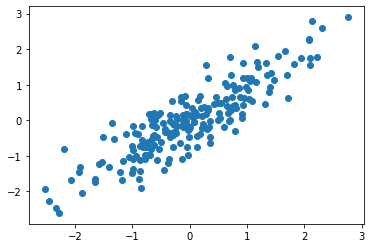

In [8]:
# 標準化
x_std = scipy.stats.zscore(x)
y_std = scipy.stats.zscore(y)

# 散布図を描画
plt.scatter(x_std, y_std)


# 1. 疑似相関：因果が逆


In [9]:
# ノイズの生成
num_data = 200
e_x = randn(num_data)
e_y = randn(num_data)

# データの生成
y = e_y
x = 2*y + e_x

# 相関係数を求める
np.corrcoef(x, y)


array([[1.        , 0.87975464],
       [0.87975464, 1.        ]])

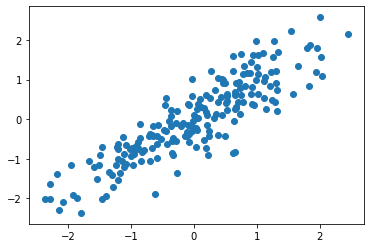

In [10]:
# 標準化
x_std = scipy.stats.zscore(x)
y_std = scipy.stats.zscore(y)

# 散布図を描画
plt.scatter(x_std, y_std)


# 2. 疑似相関：共通の原因（交絡）


In [12]:
# ノイズの生成
num_data = 200
e_x = randn(num_data)
e_y = randn(num_data)
e_z = randn(num_data)

# データの生成
x = 3.3*e_z + e_x
y = 3.3*e_z + e_y

# 相関係数を求める
np.corrcoef(x, y)


array([[1.        , 0.89922269],
       [0.89922269, 1.        ]])

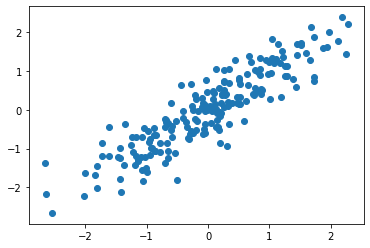

In [13]:
# 標準化
x_std = scipy.stats.zscore(x)
y_std = scipy.stats.zscore(y)

# 散布図を描画
plt.scatter(x_std, y_std)


# 3. 疑似相関：合流点での選抜



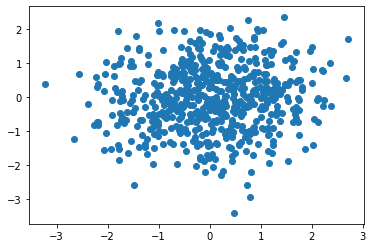

In [14]:
# ノイズの生成
num_data = 600
e_x = randn(num_data)
e_y = randn(num_data)

# データの生成 1
x = e_x
y = e_y

# 散布図を描画
plt.scatter(x, y)


In [17]:
# 相関係数を求める
np.corrcoef(x, y)


array([[1.        , 0.08098049],
       [0.08098049, 1.        ]])

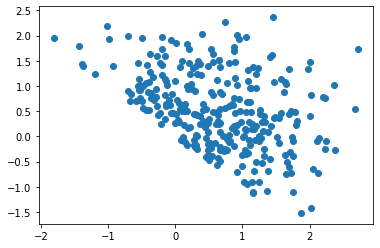

In [15]:
# 合流点を作成
z = x + y

# 新たな合流点での条件を満たす変数の用意
x_new = np.array([])
y_new = np.array([])

# zの値が0以上で選抜してnew変数に追加（append）します
for i in range(num_data):
  if z[i] > 0.0:
    x_new = np.append(x_new, x[i])
    y_new = np.append(y_new, y[i])

# 散布図を描画
plt.scatter(x_new, y_new)


In [16]:
# 相関係数を求める
np.corrcoef(x_new, y_new)


array([[ 1.        , -0.40705829],
       [-0.40705829,  1.        ]])

以上。